In [1]:
import pandas as pd


df = pd.read_csv('Data.csv')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


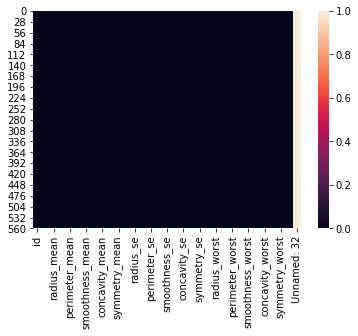

In [4]:
#To check nan values are available or  not:
sns.heatmap(df.isnull())

In [5]:
df.info()# Plotting the distribution of numerical and boolean categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)

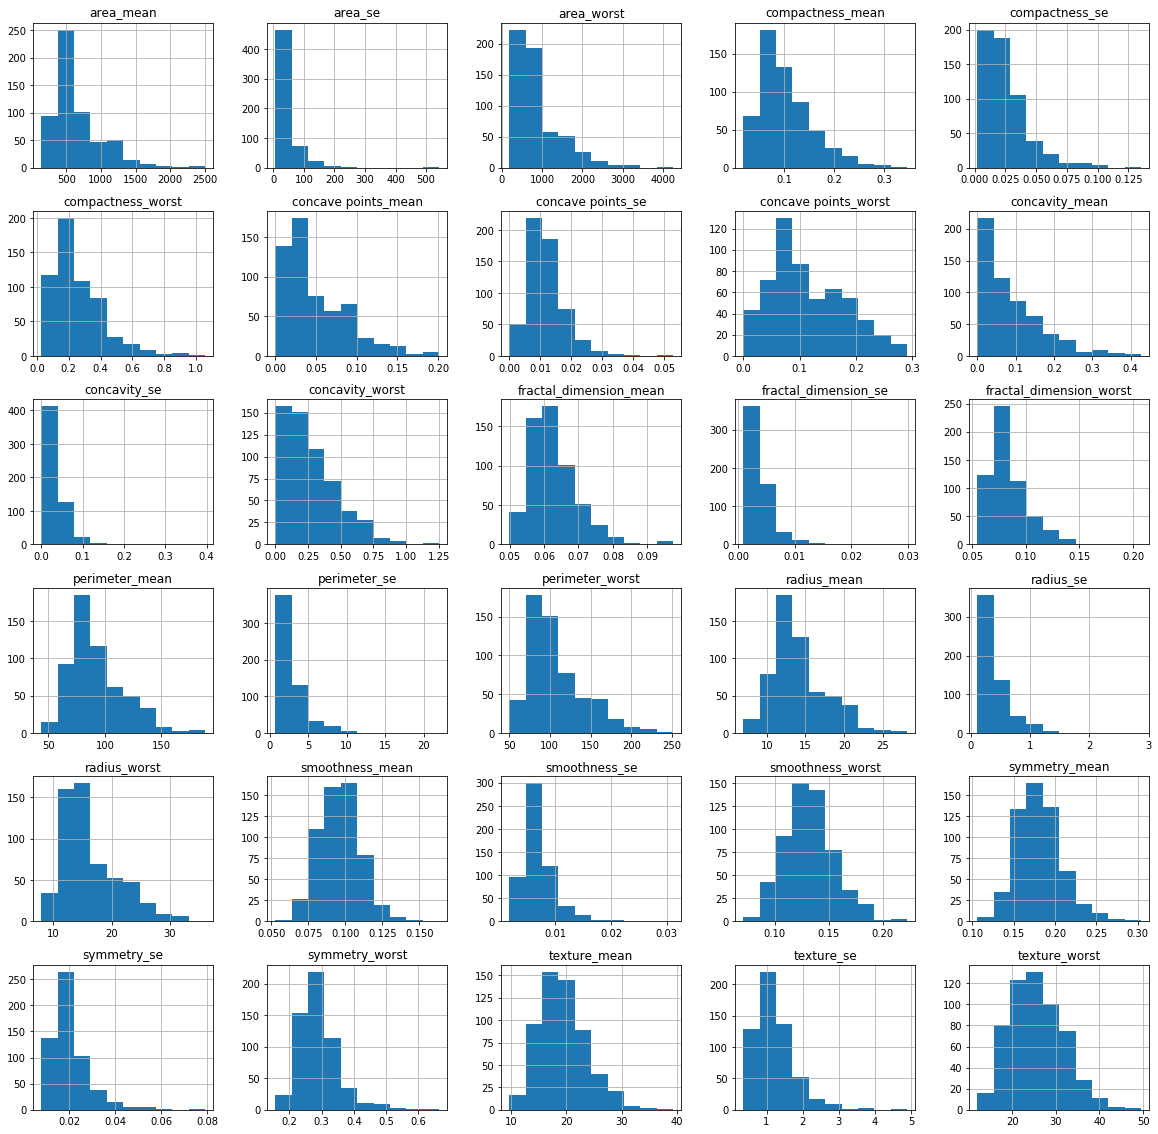

In [7]:
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [10]:

df.diagnosis.replace({'M':1,'B':0},inplace=True)
X=np.array(df.drop(['diagnosis'],1))
y=np.array(df['diagnosis'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


# Predicting the Test set results

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)

[[125   4]
 [  2  69]]
Accuracy score of train SVM
98.6449864498645
Accuracy score of test SVM
97.0


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       129
           1       0.95      0.97      0.96        71

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [26]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = i, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rft = confusion_matrix(y_test, y_pred)

In [27]:
print(rft)
print("Accuracy score of train RFT")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test RFT")
print(accuracy_score(y_test, y_pred)*100)

[[127   2]
 [  5  66]]
Accuracy score of train RFT
98.6449864498645
Accuracy score of test RFT
96.5


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       129
           1       0.97      0.93      0.95        71

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [29]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)

In [30]:
classifier.fit(X_train, y_train)
y_pred =classifier.predict(X_test)
ad = confusion_matrix(y_test, y_pred)

In [31]:
print(ad)
print("Accuracy score of train Adaboost")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test Adaboost")
print(accuracy_score(y_test, y_pred)*100)

[[125   4]
 [  1  70]]
Accuracy score of train Adaboost
98.6449864498645
Accuracy score of test Adaboost
97.5


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       129
           1       0.95      0.99      0.97        71

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [33]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred =gnb.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)

In [38]:
print(c_m)
print("Accuracy score of train Naive Bayes")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test Naive Bayes")
print(accuracy_score(y_test, y_pred)*100)

[[123   6]
 [  6  65]]
Accuracy score of train Naive Bayes
98.6449864498645
Accuracy score of test Naive Bayes
94.0


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       129
           1       0.92      0.92      0.92        71

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred =classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)

In [43]:
print(cfm)
print("Accuracy score of train Decision Tree Classifier")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test Decision Tree Classifier")
print(accuracy_score(y_test, y_pred)*100)

[[127   2]
 [  6  65]]
Accuracy score of train Decision Tree Classifier
98.6449864498645
Accuracy score of test Decision Tree Classifier
96.0


In [46]:
from sklearn.ensemble import VotingClassifier
dec_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
rnd_clf=RandomForestClassifier()
svm_clf=SVC()
voting_clf=VotingClassifier(estimators=[('dec_clf',dec_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard') 
voting_clf.fit(X_train,y_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('dec_clf',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=0,
                                                     splitter='best')),
 

In [48]:
voting_clf.fit(X_train, y_train)
y_pred =voting_clf.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
print(cfm)
print("Accuracy score of train Voting Classifier")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test Voting Classifier")
print(accuracy_score(y_test, y_pred)*100)

[[127   2]
 [  4  67]]
Accuracy score of train Voting Classifier
98.6449864498645
Accuracy score of test Voting Classifier
97.0


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       129
           1       0.97      0.94      0.96        71

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200



In [52]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


In [59]:
classifier = Sequential()


classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10,validation_data=(X_test, y_test))


Train on 369 samples, validate on 200 samples
Epoch 1/10
369/369 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.6098 - val_loss: 0.6752 - val_accuracy: 0.7400
Epoch 2/10
369/369 [==============================] - 0s 354us/step - loss: 0.6052 - accuracy: 0.9051 - val_loss: 0.4528 - val_accuracy: 0.9450
Epoch 3/10
369/369 [==============================] - 0s 295us/step - loss: 0.2854 - accuracy: 0.9512 - val_loss: 0.1450 - val_accuracy: 0.9500
Epoch 4/10
369/369 [==============================] - 0s 325us/step - loss: 0.1253 - accuracy: 0.9648 - val_loss: 0.0847 - val_accuracy: 0.9750
Epoch 5/10
369/369 [==============================] - 0s 389us/step - loss: 0.0935 - accuracy: 0.9729 - val_loss: 0.0682 - val_accuracy: 0.9750
Epoch 6/10
369/369 [==============================] - 0s 297us/step - loss: 0.0804 - accuracy: 0.9783 - val_loss: 0.0614 - val_accuracy: 0.9750
Epoch 7/10
369/369 [==============================] - 0s 344us/step - loss: 0.0729 - accurac

In [60]:
classifier = Sequential()


classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 30))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'tanh'))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'tanh'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10,validation_data=(X_test, y_test))a


Train on 369 samples, validate on 200 samples
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.6720 - accuracy: 0.7480 - val_loss: 0.5862 - val_accuracy: 0.9200
Epoch 2/10
369/369 [==============================] - 0s 340us/step - loss: 0.3750 - accuracy: 0.9377 - val_loss: 0.2049 - val_accuracy: 0.9400
Epoch 3/10
369/369 [==============================] - 0s 327us/step - loss: 0.1657 - accuracy: 0.9593 - val_loss: 0.1051 - val_accuracy: 0.9900
Epoch 4/10
369/369 [==============================] - 0s 338us/step - loss: 0.1110 - accuracy: 0.9756 - val_loss: 0.0838 - val_accuracy: 0.9850
Epoch 5/10
369/369 [==============================] - 0s 384us/step - loss: 0.0904 - accuracy: 0.9756 - val_loss: 0.0727 - val_accuracy: 0.9850
Epoch 6/10
369/369 [==============================] - 0s 351us/step - loss: 0.0798 - accuracy: 0.9837 - val_loss: 0.0647 - val_accuracy: 0.9850
Epoch 7/10
369/369 [==============================] - 0s 297us/step - loss: 0.0766 - accurac

In [64]:
classifier = Sequential()


classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20,validation_data=(X_test, y_test))


Train on 369 samples, validate on 200 samples
Epoch 1/20
369/369 [==============================] - 1s 2ms/step - loss: 0.6833 - accuracy: 0.6125 - val_loss: 0.6630 - val_accuracy: 0.6450
Epoch 2/20
369/369 [==============================] - 0s 448us/step - loss: 0.6682 - accuracy: 0.6179 - val_loss: 0.6559 - val_accuracy: 0.6450
Epoch 3/20
369/369 [==============================] - 0s 425us/step - loss: 0.6632 - accuracy: 0.6179 - val_loss: 0.6460 - val_accuracy: 0.6450
Epoch 4/20
369/369 [==============================] - 0s 437us/step - loss: 0.6572 - accuracy: 0.6179 - val_loss: 0.6411 - val_accuracy: 0.6450
Epoch 5/20
369/369 [==============================] - 0s 593us/step - loss: 0.6525 - accuracy: 0.6179 - val_loss: 0.6349 - val_accuracy: 0.6450
Epoch 6/20
369/369 [==============================] - 0s 456us/step - loss: 0.6474 - accuracy: 0.6179 - val_loss: 0.6287 - val_accuracy: 0.6450
Epoch 7/20
369/369 [==============================] - 0s 415us/step - loss: 0.6421 - accurac

In [72]:
classifier = Sequential()


classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 30))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'tanh'))


classifier.add(Dense(units =20, kernel_initializer = 'uniform', activation = 'tanh'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10,validation_data=(X_test, y_test))

Train on 369 samples, validate on 200 samples
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.6665 - accuracy: 0.7832 - val_loss: 0.5684 - val_accuracy: 0.9200
Epoch 2/10
369/369 [==============================] - 0s 424us/step - loss: 0.3670 - accuracy: 0.9377 - val_loss: 0.2012 - val_accuracy: 0.9450
Epoch 3/10
369/369 [==============================] - 0s 354us/step - loss: 0.1605 - accuracy: 0.9648 - val_loss: 0.1020 - val_accuracy: 0.9900
Epoch 4/10
369/369 [==============================] - 0s 377us/step - loss: 0.1059 - accuracy: 0.9756 - val_loss: 0.0799 - val_accuracy: 0.9850
Epoch 5/10
369/369 [==============================] - 0s 337us/step - loss: 0.0884 - accuracy: 0.9783 - val_loss: 0.0707 - val_accuracy: 0.9850
Epoch 6/10
369/369 [==============================] - 0s 669us/step - loss: 0.0818 - accuracy: 0.9837 - val_loss: 0.0622 - val_accuracy: 0.9900
Epoch 7/10
369/369 [==============================] - 0s 562us/step - loss: 0.0738 - accurac